In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
%matplotlib inline
import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.tools as tls
import plotly.figure_factory as ff
py.init_notebook_mode(connected=True)
import squarify
#ignore warning messages 
import warnings
warnings.filterwarnings('ignore')

In [69]:
data = pd.read_csv('diabetes.csv')

In [70]:
data


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

In [71]:
display(data.describe())

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [72]:
data.shape

(768, 9)

In [73]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [74]:
data.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

<AxesSubplot:xlabel='Outcome', ylabel='count'>

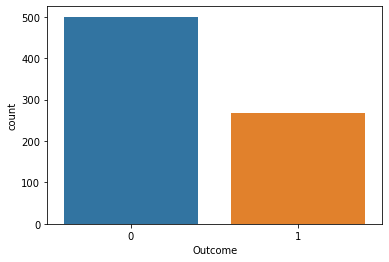

In [75]:
sns.countplot(data["Outcome"])

0- healthy
1- diabetes

In [76]:
data["Outcome"].unique()

array([1, 0], dtype=int64)

In [77]:
# 2 datasets
D = data[(data['Outcome'] != 0)]
H = data[(data['Outcome'] == 0)]

#------------COUNT-----------------------
def target_count():
    trace = go.Bar( x = data['Outcome'].value_counts().values.tolist(), 
                    y = ['healthy','diabetic' ], 
                    orientation = 'h', 
                    text=data['Outcome'].value_counts().values.tolist(), 
                    textfont=dict(size=15),
                    textposition = 'auto',
                    opacity = 0.8,marker=dict(
                    color=['lightskyblue', 'gold'],
                    line=dict(color='#000000',width=1.5)))

    layout = dict(title =  'Count of Outcome variable')

    fig = dict(data = [trace], layout=layout)
    py.iplot(fig)

#------------PERCENTAGE-------------------
def target_percent():
    trace = go.Pie(labels = ['healthy','diabetic'], values = data['Outcome'].value_counts(), 
                   textfont=dict(size=15), opacity = 0.8,
                   marker=dict(colors=['lightskyblue', 'gold'], 
                               line=dict(color='#000000', width=1.5)))


    layout = dict(title =  'Distribution of Outcome variable')

    fig = dict(data = [trace], layout=layout)
    py.iplot(fig)

In [78]:
target_count()

In [79]:
target_percent()

In [80]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [81]:
from sklearn.model_selection import train_test_split
X= data.drop(['Outcome'], axis=1) ## remove score label from data
y = data['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [82]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(537, 8)
(231, 8)
(537,)
(231,)


In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import GradientBoostingClassifier 

models = { 
    'Logistic_Regression' : LogisticRegression(random_state=42),
    'SVC' : SVC(kernel='rbf', gamma=0.5, probability=True),
    'DecisionTreeClassifier': DecisionTreeClassifier(max_depth=1, random_state=42) ,
    'GradientBoostingClassifier' : GradientBoostingClassifier(max_depth=1, n_estimators=3, learning_rate=1.0, random_state=42)
} 

In [84]:
from sklearn.metrics import precision_score, recall_score, accuracy_score 

def loss(y_true, y_pred, retur=False): 
    pre = precision_score(y_true, y_pred, average='macro')  
    rec = recall_score(y_true, y_pred, average='macro') 
    accuracy = accuracy_score(y_true, y_pred)
    
    if retur:
        return pre, rec, accuracy 
    else: 
        print(pre) 
        print(rec) 
        print(accuracy)

In [85]:
def train_and_eval(models, X,y): 
    for name, model in models.items(): 
        print(name ,':')  
        model.fit(X,y)
        loss(y, model.predict(X)) 
        print('*' * 30) 

In [86]:
train_and_eval(models, X_train, y_train)

Logistic_Regression :
0.7686120528609978
0.7366792659879291
0.7821229050279329
******************************
SVC :
1.0
1.0
1.0
******************************
DecisionTreeClassifier :
0.7988562178228331
0.6716378101566787
0.7597765363128491
******************************
GradientBoostingClassifier :
0.8083971553610503
0.6718435652014875
0.7616387337057728
******************************


In [87]:
#Importing XGBoost
from xgboost import XGBClassifier

#Defining XGB classification model
clf = XGBClassifier()

In [88]:
from sklearn import preprocessing

from sklearn import model_selection

from sklearn import metrics

#defining a set of values as a dictionary for hyperparameters

param_grid = {

    "n_estimators":[100,200,300,400],

    "max_depth":[1,3,5,7],

    "reg_lambda":[.01,.1,.5]    

}

#declaring GridSearchCV model

model = model_selection.GridSearchCV(

    estimator = clf,

    param_grid = param_grid,

    scoring = 'accuracy',

    verbose = 10,

    n_jobs = 1,

    cv = 5    

)

#fitting values to the gridsearchcv model

model.fit(X,y)

#printing the best possible values to enhance accuracy

print(model.best_params_)

print(model.best_estimator_)

#printing the best score

print(model.best_score_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] max_depth=1, n_estimators=100, reg_lambda=0.01 ..................
[19:05:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=1, n_estimators=100, reg_lambda=0.01, score=0.753, total=   0.3s
[CV] max_depth=1, n_estimators=100, reg_lambda=0.01 ..................
[19:05:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  max_depth=1, n_estimators=100, reg_lambda=0.01, score=0.753, total=   0.1s
[CV] max_depth=1, n_estimators=100, reg_lambda=0.01 ..................
[19:05:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  max_depth=1, n_estimators=100, reg_lambda=0.01, score=0.779, total=   

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s



[CV] max_depth=1, n_estimators=100, reg_lambda=0.01 ..................
[19:05:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  max_depth=1, n_estimators=100, reg_lambda=0.01, score=0.824, total=   0.1s
[CV] max_depth=1, n_estimators=100, reg_lambda=0.01 ..................
[19:05:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.6s remaining:    0.0s


[CV]  max_depth=1, n_estimators=100, reg_lambda=0.01, score=0.745, total=   0.1s
[CV] max_depth=1, n_estimators=100, reg_lambda=0.1 ...................
[19:05:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  max_depth=1, n_estimators=100, reg_lambda=0.1, score=0.747, total=   0.1s
[CV] max_depth=1, n_estimators=100, reg_lambda=0.1 ...................
[19:05:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.8s remaining:    0.0s


[CV]  max_depth=1, n_estimators=100, reg_lambda=0.1, score=0.740, total=   0.1s
[CV] max_depth=1, n_estimators=100, reg_lambda=0.1 ...................
[19:05:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  max_depth=1, n_estimators=100, reg_lambda=0.1, score=0.779, total=   0.1s
[CV] max_depth=1, n_estimators=100, reg_lambda=0.1 ...................
[19:05:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  max_depth=1, n_estimators=100, reg_lambda=0.1, score=0.824, total=   0.1

[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    1.0s remaining:    0.0s



[CV] max_depth=1, n_estimators=100, reg_lambda=0.1 ...................
[19:05:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  max_depth=1, n_estimators=100, reg_lambda=0.1, score=0.758, total=   0.1s
[CV] max_depth=1, n_estimators=100, reg_lambda=0.5 ...................
[19:05:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  max_depth=1, n_estimators=100, reg_lambda=0.5, score=0.753, total=   0.1s
[CV] max_depth=1, n_estimators=100, reg_lambda=0.5 ...................
[19:05

[CV]  max_depth=1, n_estimators=200, reg_lambda=0.5, score=0.753, total=   0.2s
[CV] max_depth=1, n_estimators=200, reg_lambda=0.5 ...................
[19:05:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  max_depth=1, n_estimators=200, reg_lambda=0.5, score=0.786, total=   0.2s
[CV] max_depth=1, n_estimators=200, reg_lambda=0.5 ...................
[19:05:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  max_depth=1, n_estimators=200, reg_lambda=0.5, score=0.817, total=   0.2

[CV]  max_depth=1, n_estimators=300, reg_lambda=0.5, score=0.752, total=   0.2s
[CV] max_depth=1, n_estimators=400, reg_lambda=0.01 ..................
[19:05:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  max_depth=1, n_estimators=400, reg_lambda=0.01, score=0.753, total=   0.3s
[CV] max_depth=1, n_estimators=400, reg_lambda=0.01 ..................
[19:05:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  max_depth=1, n_estimators=400, reg_lambda=0.01, score=0.734, total=   0

[CV]  max_depth=3, n_estimators=100, reg_lambda=0.01, score=0.771, total=   0.2s
[CV] max_depth=3, n_estimators=100, reg_lambda=0.01 ..................
[19:05:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  max_depth=3, n_estimators=100, reg_lambda=0.01, score=0.739, total=   0.2s
[CV] max_depth=3, n_estimators=100, reg_lambda=0.1 ...................
[19:05:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  max_depth=3, n_estimators=100, reg_lambda=0.1, score=0.773, total=   0

[CV]  max_depth=3, n_estimators=200, reg_lambda=0.1, score=0.727, total=   0.3s
[CV] max_depth=3, n_estimators=200, reg_lambda=0.1 ...................
[19:05:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  max_depth=3, n_estimators=200, reg_lambda=0.1, score=0.740, total=   0.3s
[CV] max_depth=3, n_estimators=200, reg_lambda=0.1 ...................
[19:05:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  max_depth=3, n_estimators=200, reg_lambda=0.1, score=0.778, total=   0.3

[CV]  max_depth=3, n_estimators=300, reg_lambda=0.1, score=0.725, total=   0.4s
[CV] max_depth=3, n_estimators=300, reg_lambda=0.5 ...................
[19:05:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  max_depth=3, n_estimators=300, reg_lambda=0.5, score=0.747, total=   0.4s
[CV] max_depth=3, n_estimators=300, reg_lambda=0.5 ...................
[19:05:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  max_depth=3, n_estimators=300, reg_lambda=0.5, score=0.695, total=   0.4

[CV]  max_depth=3, n_estimators=400, reg_lambda=0.5, score=0.727, total=   0.4s
[CV] max_depth=3, n_estimators=400, reg_lambda=0.5 ...................
[19:05:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  max_depth=3, n_estimators=400, reg_lambda=0.5, score=0.771, total=   0.4s
[CV] max_depth=3, n_estimators=400, reg_lambda=0.5 ...................
[19:05:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  max_depth=3, n_estimators=400, reg_lambda=0.5, score=0.732, total=   0.4

[CV]  max_depth=5, n_estimators=200, reg_lambda=0.01, score=0.747, total=   0.3s
[CV] max_depth=5, n_estimators=200, reg_lambda=0.01 ..................
[19:05:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  max_depth=5, n_estimators=200, reg_lambda=0.01, score=0.721, total=   0.3s
[CV] max_depth=5, n_estimators=200, reg_lambda=0.01 ..................
[19:05:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  max_depth=5, n_estimators=200, reg_lambda=0.01, score=0.727, total=   

[CV]  max_depth=5, n_estimators=300, reg_lambda=0.01, score=0.778, total=   0.4s
[CV] max_depth=5, n_estimators=300, reg_lambda=0.01 ..................
[19:05:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  max_depth=5, n_estimators=300, reg_lambda=0.01, score=0.719, total=   0.4s
[CV] max_depth=5, n_estimators=300, reg_lambda=0.1 ...................
[19:05:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  max_depth=5, n_estimators=300, reg_lambda=0.1, score=0.727, total=   0

[CV]  max_depth=5, n_estimators=400, reg_lambda=0.1, score=0.714, total=   0.5s
[CV] max_depth=5, n_estimators=400, reg_lambda=0.1 ...................
[19:06:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  max_depth=5, n_estimators=400, reg_lambda=0.1, score=0.721, total=   0.5s
[CV] max_depth=5, n_estimators=400, reg_lambda=0.1 ...................
[19:06:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  max_depth=5, n_estimators=400, reg_lambda=0.1, score=0.797, total=   0.5

[CV]  max_depth=7, n_estimators=100, reg_lambda=0.1, score=0.771, total=   0.2s
[CV] max_depth=7, n_estimators=100, reg_lambda=0.5 ...................
[19:06:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  max_depth=7, n_estimators=100, reg_lambda=0.5, score=0.753, total=   0.2s
[CV] max_depth=7, n_estimators=100, reg_lambda=0.5 ...................
[19:06:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  max_depth=7, n_estimators=100, reg_lambda=0.5, score=0.740, total=   0.2

[CV]  max_depth=7, n_estimators=200, reg_lambda=0.5, score=0.734, total=   0.3s
[CV] max_depth=7, n_estimators=200, reg_lambda=0.5 ...................
[19:06:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  max_depth=7, n_estimators=200, reg_lambda=0.5, score=0.771, total=   0.4s
[CV] max_depth=7, n_estimators=200, reg_lambda=0.5 ...................
[19:06:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  max_depth=7, n_estimators=200, reg_lambda=0.5, score=0.758, total=   0.3

[CV]  max_depth=7, n_estimators=400, reg_lambda=0.01, score=0.721, total=   0.5s
[CV] max_depth=7, n_estimators=400, reg_lambda=0.01 ..................
[19:06:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  max_depth=7, n_estimators=400, reg_lambda=0.01, score=0.714, total=   0.5s
[CV] max_depth=7, n_estimators=400, reg_lambda=0.01 ..................
[19:06:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  max_depth=7, n_estimators=400, reg_lambda=0.01, score=0.727, total=   

[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:  1.3min finished


In [90]:
#defining a set of values as a dictionary for hyperparameters

param_grid = {

    "n_estimators":[100,200,300,400],

    "max_depth":[1,3,5,7],

    "reg_lambda":[.01,.1,.5]    

}

#declaring RandomizedSearchCV model

model = model_selection.RandomizedSearchCV(

    estimator = clf,

    param_distributions = param_grid,

    scoring = 'accuracy',

    verbose = 10,

    n_jobs = 1,

    cv = 5,

    n_iter=10

)

#fitting values to the RandomizedSearchCV model

model.fit(X,y)

#printing the best possible values to enhance accuracy

print(model.best_params_)

print(model.best_estimator_)

#printing the best score

print(model.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] reg_lambda=0.5, n_estimators=100, max_depth=3 ...................
[19:06:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  reg_lambda=0.5, n_estimators=100, max_depth=3, score=0.799, total=   0.1s
[CV] reg_lambda=0.5, n_estimators=100, max_depth=3 ...................
[19:06:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  reg_lambda=0.5, n_estimators=100, max_depth=3, score=0.669, total=   0.1s
[CV] reg_lambda=0.5, n_estimators=100, max_depth=3 ...................
[19:06:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  reg_lambda=0.5, n_estimators=100, max_depth=3, score=0.734, total=   0.1s
[CV] reg_lambda=0.5, n_estimators=100, max_depth=3 ...................
[19:06:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s remaining:    0.0s


[CV]  reg_lambda=0.5, n_estimators=100, max_depth=3, score=0.758, total=   0.1s
[CV] reg_lambda=0.5, n_estimators=100, max_depth=3 ...................
[19:06:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  reg_lambda=0.5, n_estimators=100, max_depth=3, score=0.739, total=   0.1s
[CV] reg_lambda=0.1, n_estimators=100, max_depth=5 ...................
[19:06:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.6s remaining:    0.0s


[CV]  reg_lambda=0.1, n_estimators=100, max_depth=5, score=0.747, total=   0.2s
[CV] reg_lambda=0.1, n_estimators=100, max_depth=5 ...................
[19:06:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  reg_lambda=0.1, n_estimators=100, max_depth=5, score=0.740, total=   0.2s

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.8s remaining:    0.0s



[CV] reg_lambda=0.1, n_estimators=100, max_depth=5 ...................
[19:06:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  reg_lambda=0.1, n_estimators=100, max_depth=5, score=0.740, total=   0.2s
[CV] reg_lambda=0.1, n_estimators=100, max_depth=5 ...................
[19:06:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    1.2s remaining:    0.0s


[CV]  reg_lambda=0.1, n_estimators=100, max_depth=5, score=0.791, total=   0.2s
[CV] reg_lambda=0.1, n_estimators=100, max_depth=5 ...................
[19:06:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    1.4s remaining:    0.0s


[CV]  reg_lambda=0.1, n_estimators=100, max_depth=5, score=0.758, total=   0.2s
[CV] reg_lambda=0.1, n_estimators=100, max_depth=1 ...................
[19:06:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  reg_lambda=0.1, n_estimators=100, max_depth=1, score=0.747, total=   0.1s
[CV] reg_lambda=0.1, n_estimators=100, max_depth=1 ...................
[19:06:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  reg_lambda=0.1, n_estimators=100, max_depth=1, score=0.740, total=   0.1

[CV]  reg_lambda=0.1, n_estimators=100, max_depth=7, score=0.714, total=   0.2s
[CV] reg_lambda=0.1, n_estimators=100, max_depth=7 ...................
[19:07:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  reg_lambda=0.1, n_estimators=100, max_depth=7, score=0.804, total=   0.2s
[CV] reg_lambda=0.1, n_estimators=100, max_depth=7 ...................
[19:07:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  reg_lambda=0.1, n_estimators=100, max_depth=7, score=0.771, total=   0.2

[CV]  reg_lambda=0.5, n_estimators=200, max_depth=7, score=0.760, total=   0.3s
[CV] reg_lambda=0.5, n_estimators=200, max_depth=7 ...................
[19:07:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  reg_lambda=0.5, n_estimators=200, max_depth=7, score=0.714, total=   0.3s
[CV] reg_lambda=0.5, n_estimators=200, max_depth=7 ...................
[19:07:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  reg_lambda=0.5, n_estimators=200, max_depth=7, score=0.734, total=   0.3

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   14.8s finished


In [26]:
data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [27]:
# Define missing plot to detect all missing values in dataset
def missing_plot(dataset, key) :
    null_feat = pd.DataFrame(len(dataset[key]) - dataset.isnull().sum(), columns = ['Count'])
    percentage_null = pd.DataFrame((len(dataset[key]) - (len(dataset[key]) - dataset.isnull().sum()))/len(dataset[key])*100, columns = ['Count'])
    percentage_null = percentage_null.round(2)

    trace = go.Bar(x = null_feat.index, y = null_feat['Count'] ,opacity = 0.8, text = percentage_null['Count'],  textposition = 'auto',marker=dict(color = '#7EC0EE',
            line=dict(color='#000000',width=1.5)))

    layout = dict(title =  "Missing Values (count & %)")

    fig = dict(data = [trace], layout=layout)
    py.iplot(fig)

In [28]:
missing_plot(data, 'Outcome')

<AxesSubplot:>

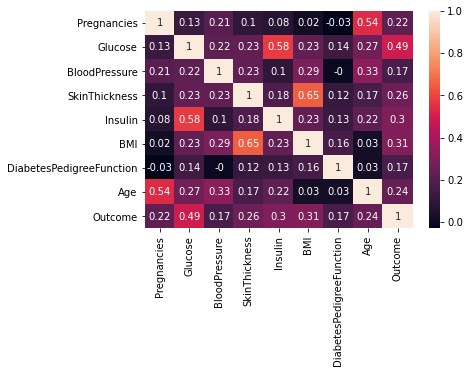

In [29]:
# compute the pair wise correlation for all columns  
correlation_matrix = data.corr().round(2)
# use the heatmap function from seaborn to plot the correlation matrix
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

In [30]:
def median_target(var):   
    temp = data[data[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp

In [33]:
def plot_distribution(data_select, size_bin) :      
    # 2 datasets
    tmp1 = D[data_select]
    tmp2 = H[data_select]
    hist_data = [tmp1, tmp2]
    
    group_labels = ['diabetic', 'healthy']
    colors = ['#FFD700', '#7EC0EE']

    fig = ff.create_distplot(hist_data, group_labels, colors = colors, show_hist = True, bin_size = size_bin, curve_type='kde')
    
    fig['layout'].update(title = data_select)

    py.iplot(fig, filename = 'Density plot')

In [34]:
plot_distribution('Insulin', 0)


In [35]:
median_target('Insulin')

Outcome  Insulin
0        0    102.5
1        1    169.5

In [36]:
data.loc[(data['Outcome'] == 0 ) & (data['Insulin'].isnull()), 'Insulin'] = 102.5
data.loc[(data['Outcome'] == 1 ) & (data['Insulin'].isnull()), 'Insulin'] = 169.5

In [37]:
plot_distribution('Glucose', 0)

In [38]:
median_target('Glucose')

Outcome  Glucose
0        0    107.0
1        1    140.0

In [39]:
data.loc[(data['Outcome'] == 0 ) & (data['Glucose'].isnull()), 'Glucose'] = 107
data.loc[(data['Outcome'] == 1 ) & (data['Glucose'].isnull()), 'Glucose'] = 140

In [40]:
plot_distribution('SkinThickness', 0)

In [41]:
median_target('SkinThickness')

Outcome  SkinThickness
0        0           27.0
1        1           32.0

In [42]:
data.loc[(data['Outcome'] == 0 ) & (data['SkinThickness'].isnull()), 'SkinThickness'] = 27
data.loc[(data['Outcome'] == 1 ) & (data['SkinThickness'].isnull()), 'SkinThickness'] = 32

In [43]:
plot_distribution('BloodPressure', 0)

In [44]:
median_target('BloodPressure')

Outcome  BloodPressure
0        0           70.0
1        1           74.5

In [45]:
data.loc[(data['Outcome'] == 0 ) & (data['BloodPressure'].isnull()), 'BloodPressure'] = 70
data.loc[(data['Outcome'] == 1 ) & (data['BloodPressure'].isnull()), 'BloodPressure'] = 74.5

In [46]:
plot_distribution('BMI', 0)

In [47]:
median_target('BMI')

Outcome   BMI
0        0  30.1
1        1  34.3

In [48]:
data.loc[(data['Outcome'] == 0 ) & (data['BMI'].isnull()), 'BMI'] = 30.1
data.loc[(data['Outcome'] == 1 ) & (data['BMI'].isnull()), 'BMI'] = 34.3

In [49]:
#plot distribution 
plot_distribution('Age', 0)
plot_distribution('Pregnancies', 0)
plot_distribution('DiabetesPedigreeFunction', 0)

In [50]:
missing_plot(data, 'Outcome')

<AxesSubplot:>

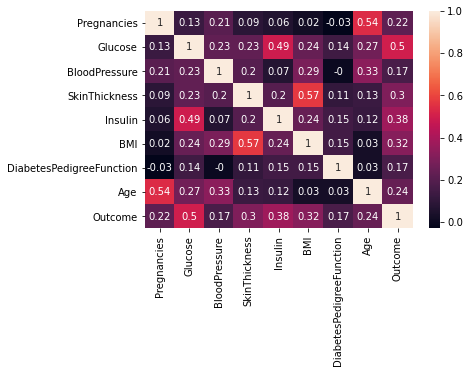

In [51]:
# compute the pair wise correlation for all columns  
correlation_matrix = data.corr().round(2)
# use the heatmap function from seaborn to plot the correlation matrix
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

In [52]:
correlations = data.corr()
correlations['Outcome'].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.495990
Insulin                     0.377081
BMI                         0.315577
SkinThickness               0.295138
Age                         0.238356
Pregnancies                 0.221898
BloodPressure               0.174469
DiabetesPedigreeFunction    0.173844
Name: Outcome, dtype: float64

In [53]:
X = data[['Glucose','Insulin']].values
y = data[['Outcome']].values

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [55]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

Text(0.5, 15.0, 'Predicted label')

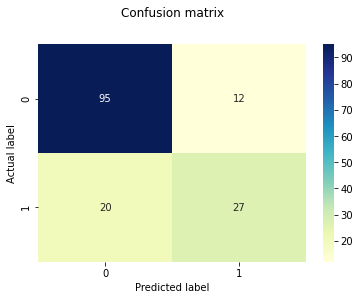

In [56]:

from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [57]:
model.score(X_test,y_test)

0.7922077922077922

In [58]:
import pickle
pickle.dump(model, open('model.pkl','wb'))

model = pickle.load(open('model.pkl','rb'))
print(model.predict([[87, 103]]))

[0]


In [59]:
import joblib 

joblib.dump(model, 'model.pkl') 

grad = joblib.load('model.pkl')

In [60]:
X_train

array([[150. , 126. ],
       [ 97. , 102.5],
       [165. , 680. ],
       ...,
       [ 94. , 102.5],
       [ 85. , 102.5],
       [136. , 102.5]])

In [61]:
X_test

array([[199. , 169.5],
       [107. , 100. ],
       [ 76. , 102.5],
       [166. , 175. ],
       [111. , 102.5],
       [ 81. ,  40. ],
       [152. , 171. ],
       [176. , 156. ],
       [127. , 275. ],
       [103. , 190. ],
       [158. , 245. ],
       [187. , 207. ],
       [114. , 102.5],
       [ 82. , 115. ],
       [ 65. , 102.5],
       [108. , 102.5],
       [179. , 130. ],
       [ 73. , 102.5],
       [132. , 102.5],
       [ 99. ,  83. ],
       [144. , 169.5],
       [118. , 169.5],
       [ 87. , 102.5],
       [ 61. , 102.5],
       [ 97. , 140. ],
       [124. , 102.5],
       [104. , 102.5],
       [153. , 140. ],
       [112. , 102.5],
       [110. , 102.5],
       [136. , 135. ],
       [102. ,  78. ],
       [102. , 105. ],
       [122. , 158. ],
       [119. ,  50. ],
       [168. , 169.5],
       [136. , 130. ],
       [117. ,  71. ],
       [119. ,  63. ],
       [180. ,  70. ],
       [119. ,  92. ],
       [ 90. , 102.5],
       [ 99. ,  54. ],
       [193

In [62]:
y_train

array([[1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
    

In [63]:
y_test


array([[1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [65]:
grad.predict([[150,126]])

array([1], dtype=int64)

In [66]:
grad.predict([[199,169.5]])

array([1], dtype=int64)